In [266]:
import pandas as pd
import plotly.express as px
import numpy as np
from itertools import repeat
from urllib.request import urlopen
import ssl
import time
import urllib.request
import pandas.plotting._matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Read in Data

In [267]:
train = pd.read_csv('/Users/calebsmith/Library/Mobile Documents/com~apple~CloudDocs/Documents/Aunalytics/Data Science Assessment/au_train.csv', skiprows = 1)
test = pd.read_csv('/Users/calebsmith/Library/Mobile Documents/com~apple~CloudDocs/Documents/Aunalytics/Data Science Assessment/au_test.csv', skiprows = 1)

In [268]:
train.shape

(32561, 15)

In [269]:
test.shape

(16281, 15)

In [270]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [271]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [272]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

# EDA

In [273]:
total = pd.concat([train, test])
total

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### Age

In [274]:
age_counts = total.groupby('age').count()[['workclass']].rename(columns = {'workclass': 'count'})
age_counts.reset_index(inplace = True)
age_counts

,age,count
0,17,595
1,18,862
2,19,1053
3,20,1113
4,21,1096
...,...,...
69,86,1
70,87,3
71,88,6
72,89,2


In [275]:
age_counts['count'].sum() - len(total) #confirms that all the age values are listed here

0

array([[<Axes: title={'center': 'age'}>]], dtype=object)

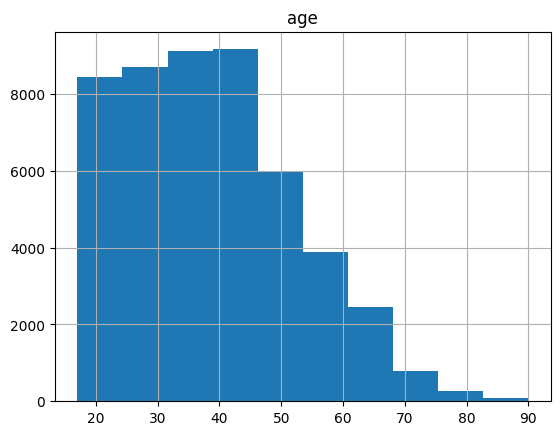

In [276]:
total.hist('age')

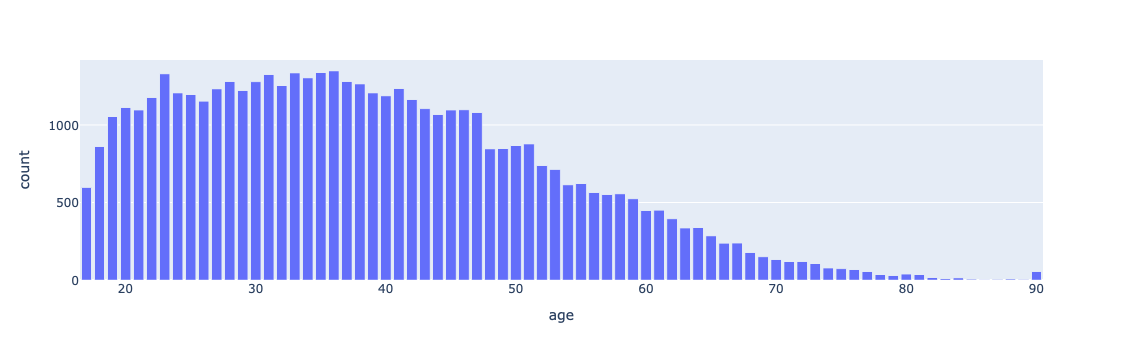

In [277]:
px.bar(age_counts, x = 'age', y = 'count')

### Work Class

In [278]:
wc_counts = total.groupby('workclass').count()[['age']].rename(columns = {'age': 'count'})
wc_counts.reset_index(inplace = True)
wc_counts

,workclass,count
0,?,2799
1,Federal-gov,1432
2,Local-gov,3136
3,Never-worked,10
4,Private,33906
5,Self-emp-inc,1695
6,Self-emp-not-inc,3862
7,State-gov,1981
8,Without-pay,21


### fnlwgt

In [279]:
total['fnlwgt'].nunique()

28523

In [280]:
total['fnlwgt'].describe()

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

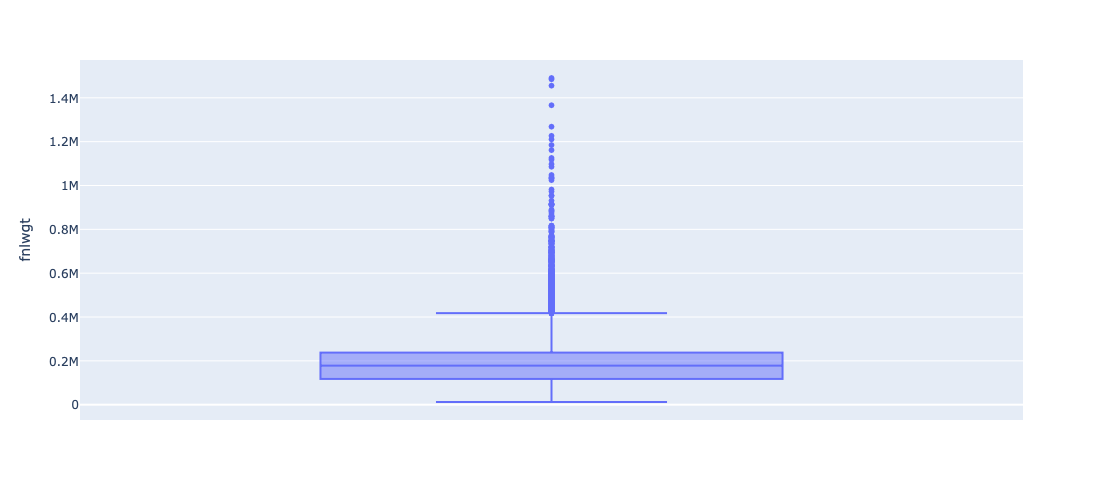

In [379]:
fnlwgt_box = px.box(total, y = 'fnlwgt')
fnlwgt_box.update_layout(width = 500, height = 500)

I don't really understand what this variable is

### Education

In [281]:
edu_counts = total.groupby('education').count()[['age']].rename(columns = {'age': 'count'})
edu_counts.reset_index(inplace = True)
edu_counts

,education,count
0,Assoc-acdm,1601
1,Assoc-voc,2061
2,Bachelors,8025
3,Doctorate,594
4,HS-grad,15784
5,Masters,2657
6,Preschool,83
7,Prof-school,834
8,Some-college,10878
9,10th,1389


### Education Num

In [387]:
edu_num_counts = total.groupby('education-num').count()[['age']].rename(columns = {'age': 'count'})
edu_income = total.groupby('education-num').sum()[['class>50K']]
edu_num_counts['>50K'] = edu_income['class>50K']
edu_num_counts['%>50K'] = 100*round(edu_num_counts['>50K'] / edu_num_counts['count'], 4)
edu_num_counts.reset_index(inplace = True)
edu_num_counts

,education-num,count,>50K,%>50K
0,1,83,0,0.00
1,2,247,6,2.43
2,3,509,16,3.14
3,4,955,40,4.19
4,5,756,27,3.57
5,6,1389,62,4.46
6,7,1812,60,3.31
7,8,657,33,5.02
8,9,15784,1675,10.61
9,10,10878,1387,12.75


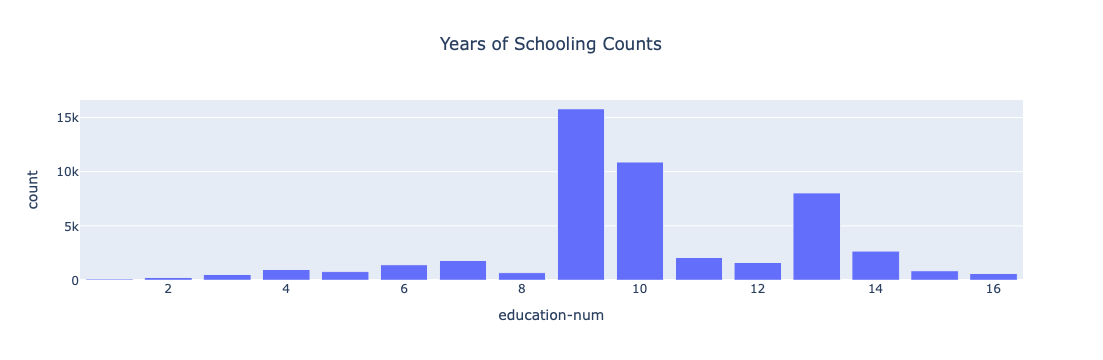

In [393]:
edu_bar = px.bar(edu_num_counts, x = 'education-num', y = 'count', title = 'Years of Schooling Counts')
edu_bar.update_layout(title_x = 0.5)

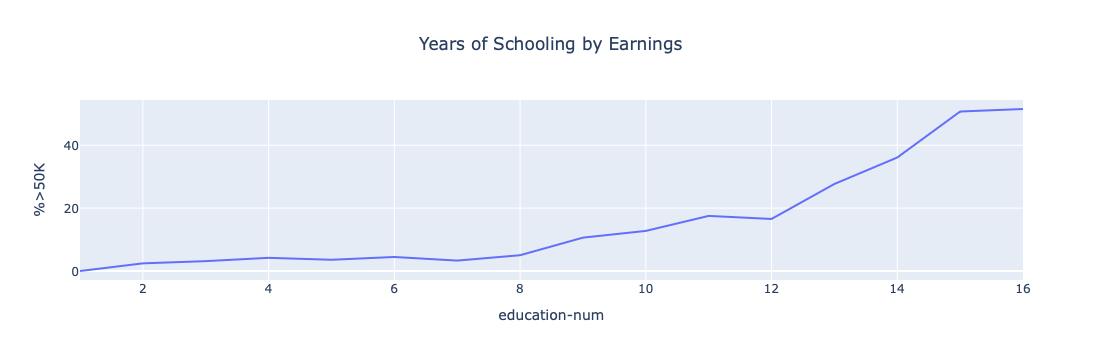

In [396]:
edu_line = px.line(edu_num_counts, x = 'education-num', y = '%>50K', title = 'Years of Schooling by Earnings')
edu_line.update_layout(title_x = 0.5)

I'm assuming this variable is how many years of schooling each person had

### Marital Status

In [283]:
ms_counts = total.groupby('marital-status').count()[['age']].rename(columns = {'age': 'count'})
ms_counts.reset_index(inplace = True)
ms_counts

,marital-status,count
0,Divorced,6633
1,Married-AF-spouse,37
2,Married-civ-spouse,22379
3,Married-spouse-absent,628
4,Never-married,16117
5,Separated,1530
6,Widowed,1518


### Occupation

In [284]:
occ_counts = total.groupby('occupation').count()[['age']].rename(columns = {'age': 'count'})
occ_counts.reset_index(inplace = True)
occ_counts

,occupation,count
0,?,2809
1,Adm-clerical,5611
2,Armed-Forces,15
3,Craft-repair,6112
4,Exec-managerial,6086
5,Farming-fishing,1490
6,Handlers-cleaners,2072
7,Machine-op-inspct,3022
8,Other-service,4923
9,Priv-house-serv,242


### Relationship

In [285]:
rel_counts = total.groupby('relationship').count()[['age']].rename(columns = {'age': 'count'})
rel_counts.reset_index(inplace = True)
rel_counts

,relationship,count
0,Husband,19716
1,Not-in-family,12583
2,Other-relative,1506
3,Own-child,7581
4,Unmarried,5125
5,Wife,2331


### Race

In [286]:
race_counts = total.groupby('race').count()[['age']].rename(columns = {'age': 'count'})
race_counts.reset_index(inplace = True)
race_counts

,race,count
0,Amer-Indian-Eskimo,470
1,Asian-Pac-Islander,1519
2,Black,4685
3,Other,406
4,White,41762


### Sex

In [287]:
sex_counts = total.groupby('sex').count()[['age']].rename(columns = {'age': 'count'})
sex_counts.reset_index(inplace = True)
sex_counts

,sex,count
0,Female,16192
1,Male,32650


### Caplital Gain

In [288]:
total['capital-gain'].nunique()

123

In [289]:
cg_counts = total.groupby('capital-gain').count()[['age']].rename(columns = {'age': 'count'})
cg_counts.reset_index(inplace = True)
cg_counts.sort_values('count', ascending = False).head(10)

,capital-gain,count
0,0,44807
112,15024,513
98,7688,410
95,7298,364
122,99999,244
52,3103,152
81,5178,146
79,5013,117
70,4386,108
101,8614,82


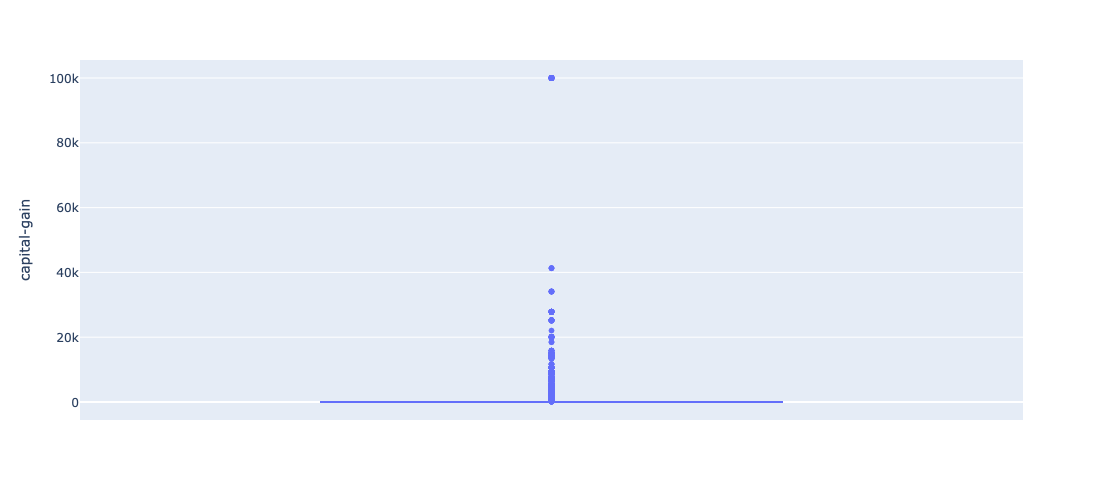

In [394]:
gain_box = px.box(total, y = 'capital-gain')
gain_box.update_layout(width = 500, height = 500)

This variable is weird

### Capital Loss

In [290]:
total['capital-loss'].nunique()

99

In [291]:
cl_counts = total.groupby('capital-loss').count()[['age']].rename(columns = {'age': 'count'})
cl_counts.reset_index(inplace = True)
cl_counts.sort_values('count', ascending = False).head(10)

,capital-loss,count
0,0,46560
51,1902,304
55,1977,253
50,1887,233
81,2415,72
19,1485,71
47,1848,67
28,1602,62
26,1590,62
49,1876,59


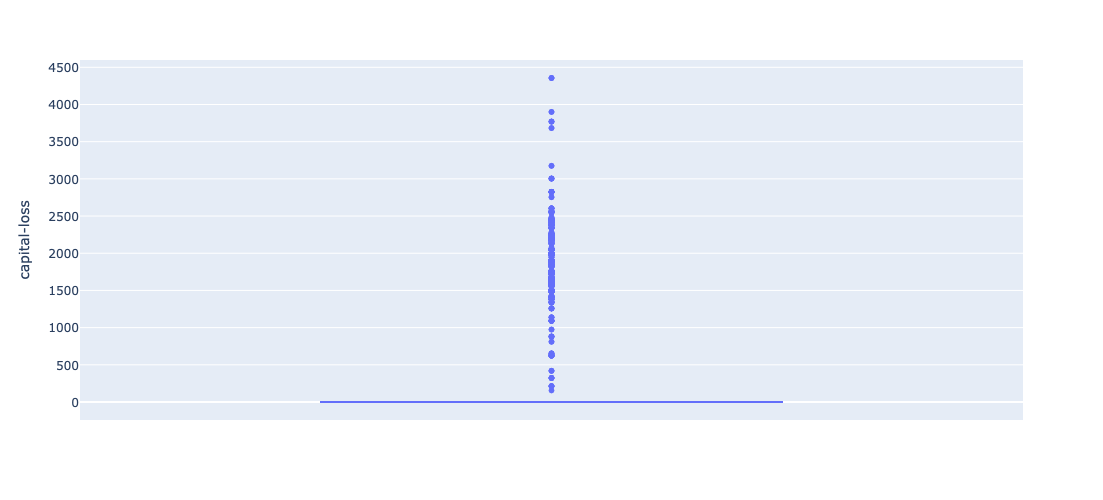

In [395]:
loss_box = px.box(total, y = 'capital-loss')
loss_box.update_layout(width = 500, height = 500)

This variable is also weird

### Hours per Week

In [292]:
total['hours-per-week'].nunique()

96

In [293]:
hours_counts = total.groupby('hours-per-week').count()[['age']].rename(columns = {'age': 'count'})
hours_counts.reset_index(inplace = True)
hours_counts

,hours-per-week,count
0,1,27
1,2,53
2,3,59
3,4,84
4,5,95
...,...,...
91,95,2
92,96,9
93,97,2
94,98,14


In [294]:
px.bar(hours_counts, x = 'hours-per-week', y = 'count')

### Native Country

In [295]:
nc_counts = total.groupby('native-country').count()[['age']].rename(columns = {'age': 'count'})
nc_counts.reset_index(inplace = True)
nc_counts

,native-country,count
0,?,857
1,Cambodia,28
2,Canada,182
3,China,122
4,Columbia,85
5,Cuba,138
6,Dominican-Republic,103
7,Ecuador,45
8,El-Salvador,155
9,England,127


### Class

In [296]:
class_counts = total.groupby('class').count()[['age']].rename(columns = {'age': 'count'})
class_counts.reset_index(inplace = True)
class_counts

,class,count
0,<=50K,24720
1,<=50K.,12435
2,>50K,7841
3,>50K.,3846


In [297]:
class_counts_train = train.groupby('class').count()[['age']].rename(columns = {'age': 'count'})
class_counts_train.reset_index(inplace = True)
class_counts_train['%'] = round(class_counts_train['count'] / len(train), 4) * 100
class_counts_train

,class,count,%
0,<=50K,24720,75.92
1,>50K,7841,24.08


In [298]:
class_counts_test = test.groupby('class').count()[['age']].rename(columns = {'age': 'count'})
class_counts_test.reset_index(inplace = True)
class_counts_test['%'] = round(class_counts_test['count'] / len(test), 4) * 100
class_counts_test

,class,count,%
0,<=50K.,12435,76.38
1,>50K.,3846,23.62


Test and train data are formatted slightly different here, will have to remove the period from the test values when assessing the accuracy of my model(s)

### Feature Correlations

In [299]:
total['capital-gain'].corr(total['capital-loss'])

-0.03144077064746341

In [300]:
total['capital-gain'].corr(total['hours-per-week'])

0.08215727805587882

In [301]:
total['hours-per-week'].corr(total['fnlwgt'])

-0.013518714690561442

In [302]:
total['age'].corr(total['capital-gain'])

0.07722902236438094

In [303]:
total['age'].corr(total['education-num'])

0.030940375874513957

None of these features seem to be correlated with one another, but to demonstrate some understanding of feature engineering I'll create a field that combines capital gains and losses

In [304]:
train['capital'] = train['capital-gain'] - train['capital-loss']
test['capital'] = test['capital-gain'] - test['capital-loss']

# Data Cleaning

In [305]:
train = train.replace(' ?', np.nan)
test = test.replace({' ?': np.nan, '<=50K.': '<=50K', '>50K.': '>50K'})

In [306]:
train['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [307]:
test['occupation'].unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv', nan,
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

Decided for this project it was just easier to drop all rows with missing values:

In [308]:
train.dropna(inplace = True)
train.shape

(30162, 16)

In [309]:
test.dropna(inplace = True)
test.shape

(15060, 16)

In [310]:
test['class']

0        <=50K
1        <=50K
2         >50K
3         >50K
5        <=50K
         ...  
16275    <=50K
16276    <=50K
16278    <=50K
16279    <=50K
16280     >50K
Name: class, Length: 15060, dtype: object

Not much more to do here thankfully, this data is remarkably clean. On a real DS project this section would probably take a lot longer.

# Encoding Categorical Variables

I'm only going to preform simple encoding techniques here. On a real project, I could do things such as mean encoding variables around native country and occupation. This should improve the effectiveness of the model, but because of the scope and setup of this project, I have refrained from doing so. More explanation to come later

### Work Class

In [311]:
train['workclass_private'] = (train['workclass'] == ' Private')
train['workclass_private'].unique()

array([False,  True])

In [312]:
test['workclass_private'] = (test['workclass'] == ' Private')
test['workclass_private'].unique()

array([ True, False])

"Private" is by far the most common work class, so for purposes of this project I turned this into a dummy variable

### Education

I'm going to use "education-num" instead of "education" for this project. So the "education" column will be dropped. But I thought about grouping these into a smaller series of dummy variables such as "HS", "Undergrad", and "Postgrad" since this is an ordinal variable. If it wasn't for the "education-num" column I would have done this, but these 2 columns are giving basically the same information in different ways so I'm just going to drop the "education" column

### Marital Status

I'm going to group the 4 married categories together as "Married" (1) and the rest as "Single" (0). There's probably a number of different ways to do this (is "married-spouse-absent" or "separated" really closer to married than single?), but this was the simplest way for the purposes of this project

In [313]:
train['married'] = train['marital-status'].isin([' Married-civ-spouse', ' Married-spouse-absent', ' Married-AF-spouse', ' Separated'])
train.groupby('married').count()[['age']].rename(columns = {'age': 'count'})

,count
married,
False,14767
True,15395


In [314]:
test['married'] = test['marital-status'].isin([' Married-civ-spouse', ' Married-spouse-absent', ' Married-AF-spouse', ' Separated'])
test.groupby('married').count()[['age']].rename(columns = {'age': 'count'})

,count
married,
False,7405
True,7655


### Occupation

I'm going to use this variable for my segmentation study and leave it out of my initial analysis. There are a few reasons for this. First, this is a variable that would need to be mean-encoded to be included in this analysis. Not only is doing this a time-intensive process, but I would also need to split a "feature" group out of the data. Typically this is done at the same time as your train/test split, but since training and testing data have already been split for me, splitting out an additional feature dataset becomes much more complicated. Therefore, instead of doing this I will leave it out of my initial analysis and instead use it later on in my segmentation study.

Note that on a real data science engagement, this is not how I would do this. I'm guessing this column has a great amount of predictive power as it pertains to income, so mean encoding this for a model to be deployed in real life would be absolutely necessary. But because of the scope and set up of this project, I decided against it.

### Relationship

I don't really understand this variable either. What relationship is this describing? Because this is a categorical variable I don't understand, in real life I would ask data clarification questions for the client. For now, I will skip this column as well. Again, if you would like me to resubmit after having a chance to ask questions about this data, I can do that.

### Race

There are a number of ways to handle this one as well. I was initially going to simply have a dummy variable for "white" since that is by far the largest number of people in this data set, but I will include one for "black" as well just to demonstrate my understanding of variable encoding (and because "black" is easily the second most represented group in this data). The other categories arguably don't have a high enough sample size to be counted as separate categories here without grouping them together. Basically, anyone who is listed with a 0 in both dummy variables is considered "other".

Side note: in real life, some people are both white and black. Could be interesting to see the interaction that occurs when both variables = 1. But for this particular data set, this won't occur.

In [315]:
train['white'] = (train['race'] == ' White')
train['black'] = (train['race'] == ' Black')
test['white'] = (test['race'] == ' White')
test['black'] = (test['race'] == ' Black')

In [316]:
train['white'].sum()

25933

In [317]:
train['black'].sum()

2817

In [318]:
len(train)

30162

In [319]:
test['white'].sum()

12970

In [320]:
test['black'].sum()

1411

In [321]:
len(test)

15060

### Sex

In [322]:
train['male'] = (train['sex'] == ' Male')
train['male'].sum()

20380

In [323]:
test['male'] = (test['sex'] == ' Male')
test['male'].sum()

10147

### Native Country

US is by far the most common, so I'm going to turn this into a US dummy variable

In [324]:
train['US'] = (train['native-country'] == ' United-States')
train['US'].sum()

27504

In [325]:
test['US'] = (test['native-country'] == ' United-States')
test['US'].sum()

13788

### Class

In [326]:
train['class>50K'] = (train['class'] == '>50K')
train['class>50K'].sum()/len(train)

0.24892248524633645

In [327]:
test['class>50K'] = (test['class'] == '>50K')
test['class>50K'].sum()/len(test)

0.2456839309428951

# Final Datasets

In [328]:
train_x = train[['age', 'workclass_private', 'fnlwgt', 'education-num', 'married', 'white', 'black', 'male', 'capital', 'hours-per-week', 'US']]
test_x = test[['age', 'workclass_private', 'fnlwgt', 'education-num', 'married', 'white', 'black', 'male', 'capital', 'hours-per-week', 'US']]
train_y = train['class>50K']
test_y = test['class>50K']

# Classification Models

In [329]:
sum(test_y == 0) / len(test_y)

0.7543160690571049

A model predicting that everyone makes less than or equal to $50,000 would be 75% accurate. Therefore, this is our baseline accuracy to beat for our models to be useful

### Decision Tree

In [330]:
dtm = tree.DecisionTreeClassifier(random_state=0)
dtm.fit(train_x, train_y)

DecisionTreeClassifier(random_state=0)

In [331]:
y_pred = dtm.predict(test_x)

In [332]:
metrics.confusion_matrix(test_y, y_pred)

array([[9803, 1557],
       [1480, 2220]])

In [333]:
dt_auroc = metrics.roc_auc_score(test_y, y_pred)
dt_auroc

0.7314700704225352

In [334]:
# Model Accuracy
dt_acc = sum(test_y == y_pred) / len(test_y)
dt_acc

0.7983399734395751

This model is slightly better than our baseline

In [335]:
dt_importances = pd.Series(dtm.feature_importances_)
dt_importances

0     0.139221
1     0.020401
2     0.276511
3     0.138604
4     0.168463
5     0.009325
6     0.005658
7     0.016648
8     0.147432
9     0.067981
10    0.009757
dtype: float64

In [336]:
col_names = pd.Series(train_x.columns)
col_names

0                   age
1     workclass_private
2                fnlwgt
3         education-num
4               married
5                 white
6                 black
7                  male
8               capital
9        hours-per-week
10                   US
dtype: object

In [337]:
dtfi = pd.DataFrame({'Features': col_names, 'Importance': dt_importances})
dtfi.sort_values('Importance', ascending = False)

,Features,Importance
2,fnlwgt,0.276511
4,married,0.168463
8,capital,0.147432
0,age,0.139221
3,education-num,0.138604
9,hours-per-week,0.067981
1,workclass_private,0.020401
7,male,0.016648
10,US,0.009757
5,white,0.009325


fnlwgt (a variable I don't understand) is the most important variable for this decision tree model, followed by marriage status, capital, age, and education

### Random Forest

In [338]:
rfm = RandomForestClassifier(random_state=0)
rfm.fit(train_x, train_y)

RandomForestClassifier(random_state=0)

In [339]:
y_pred_rf = rfm.predict(test_x)
y_pred_rf

array([False, False,  True, ...,  True, False, False])

In [340]:
metrics.confusion_matrix(test_y, y_pred_rf)

array([[10386,   974],
       [ 1549,  2151]])

In [341]:
rf_auroc = metrics.roc_auc_score(test_y, y_pred_rf)
rf_auroc

0.7478059573658165

In [342]:
# Model Accuracy
rf_acc = sum(test_y == y_pred_rf) / len(test_y)
rf_acc

0.8324701195219123

Better accuracy than the first

In [343]:
rf_importances = pd.Series(rfm.feature_importances_)
rffi = pd.DataFrame({'Features': col_names, 'Importance': rf_importances})
rffi.sort_values('Importance', ascending = False)

,Features,Importance
2,fnlwgt,0.260749
0,age,0.179897
8,capital,0.154734
3,education-num,0.132359
4,married,0.124004
9,hours-per-week,0.094531
7,male,0.020080
1,workclass_private,0.014426
10,US,0.008206
5,white,0.006754


fnlwgt is once again the most important feature, followed by age, capital, education, and marriage status

### K-Nearest Neighbors

In [344]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)

KNeighborsClassifier()

In [345]:
y_pred_knn = knn.predict(test_x)
y_pred_knn

array([False, False, False, ..., False,  True, False])

In [346]:
metrics.confusion_matrix(test_y, y_pred_knn)

array([[10380,   980],
       [ 2497,  1203]])

In [347]:
knn_auroc = metrics.roc_auc_score(test_y, y_pred_knn)
knn_auroc

0.6194337647506662

In [348]:
# Model Accuracy
knn_acc = sum(test_y == y_pred_knn) / len(test_y)
knn_acc

0.7691235059760956

# Conclusion

There are 2 parts to my conclusion. First, I will discuss the results as I've constructed them. Second, I will discuss how I would continue to improve and refine the data (and thus the models themselves) if this were a longer engagement.

The 3 models I chose to run for this experiment were Decision Tree, Random Forest, and K-Nearest Neighbors. There are a number of other models I could've tried as well, such as Logistic Regression, Native Bayes, etc. At a certain point I thought testing out additional models was beyond the scope of this project, but I can continue building additional ones and resubmit if you wish. I tested each model for accuracy and AUROC, and built a confusion matrix for each one. Of the 3 models I contructed, Random Forest performed the best with both the highest model accuracy (83% of its predictions were correct) and AUROC (75%, basically the model is performing relatively well given the data it is asked to predict). As mentioned earlier, about 75% of people in the data make less than 50,000 dollars, so a "model" predicting that literally everyone will make under 50K would be 75% accurate. Therefore, we need to construct a model that does better than this. The K-Nearest Neighbors model is barely this, with an accuracy of about 77%. The fact that this is not much better than the baseline is reflected in the low AUROC score (about 62%). The other 2 are better (Random Forest was already mentioned above and Decision Tree had accuracy and AUROC of 80% and 73% respectively), but none of the three are terrific. Which brings me to my second point.

There are a number of things I could do with the data to improve model accuracy that I believed to be beyond the scope of this project. If you disagree with this, please let me know and I will resubmit. The most important thing I could do to improve the accuracy of this model is to ask questions about the data. I'm analyzing some data here that I don't fully understand, which is a big no-no in any data science project. Specifically, I'm completely stumped over the meaning of the fnlwgt field (I actually found this dataset online and I still don't understand what this field is). I also don't know what capital gains and losses are referring to in the context of this project, and I don't understand the meaning of the "relationship" field as it pertains to an employee's salary (for instance, I am a brother, a son, a grandson, an uncle, and unmarried, where would I fit in this category?). I also didn't include the "occupation" field in any of my models, not because I didn't understand it, but because mean encoding this variable would involve pulling out an additional "feature" group, something I wasn't sure you wanted me to do. Typically this "feature" group would be split out from the total data set (for instance lke a 60/30/10 training/testing/feature split), but the total dataset has been pre-split for me, so splitting out a feature group was more complicated than usual. I could have also gone into a lot more detail encoding variables like "native-country" (currently I'm just looking at the difference between Americans and non-Americans, but there's obviously a lot more variation in the data than just this), but didn't for the same reason. And finally, I could have tried different combinations and transformations of features than I did. As it were, the only variables I thought made sense to combine at a first glance were "captial-gains" and "capital-losses". Subtracting losses from gaines (turning this into the field "capital") proved to be an important indicator of whether or not someone made 50K a year. There are other potential combinatitions and transformations of variables I could have conducted, but that also would've really added to the time it took to complete this project. As always, if there is anything more you would like to see, please let me know and I will resubmit.

Below is a table and visualizations comparing model accuracy:

In [349]:
mod_comp = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors'], 'Accuracy': [dt_acc, rf_acc, knn_acc], 'AUROC': [dt_auroc, rf_auroc, knn_auroc]})
mod_comp.set_index('Model')

,Accuracy,AUROC
Model,,
Decision Tree,0.798340,0.731470
Random Forest,0.832470,0.747806
K-Nearest Neighbors,0.769124,0.619434


In [350]:
acc_fig = px.bar(mod_comp, x = 'Model', y = 'Accuracy')
acc_fig.update_layout(yaxis = dict(range = [0.7, 0.9]), title = 'Model Accuracy', title_x = 0.5)
acc_fig

In [351]:
roc_fig = px.bar(mod_comp, x = 'Model', y = 'AUROC')
roc_fig.update_layout(yaxis = dict(range = [0.6, 0.8]), title = 'Model AUROC', title_x = 0.5)
roc_fig

# Segmentation by Occupation

In [352]:
total['class>50K'] = (total['class'] == '>50K')
high_income = total.groupby('occupation').sum()[['class>50K']]
high_income

,class>50K
occupation,
?,191
Adm-clerical,507
Armed-Forces,1
Craft-repair,929
Exec-managerial,1968
Farming-fishing,115
Handlers-cleaners,86
Machine-op-inspct,250
Other-service,137


In [353]:
all_income = total.groupby('occupation').count()[['class>50K']].rename(columns = {'class>50K': 'Total'})
all_income

,Total
occupation,
?,2809
Adm-clerical,5611
Armed-Forces,15
Craft-repair,6112
Exec-managerial,6086
Farming-fishing,1490
Handlers-cleaners,2072
Machine-op-inspct,3022
Other-service,4923


In [354]:
all_income['>50K'] = high_income['class>50K']
all_income['<=50K'] = all_income['Total'] - all_income['>50K']
all_income['%>50K'] = 100*round(all_income['>50K'] / all_income['Total'], 4)
all_income.sort_values('Total', ascending = False)

,Total,>50K,<=50K,%>50K
occupation,,,,
Prof-specialty,6172,1859,4313,30.12
Craft-repair,6112,929,5183,15.20
Exec-managerial,6086,1968,4118,32.34
Adm-clerical,5611,507,5104,9.04
Sales,5504,983,4521,17.86
Other-service,4923,137,4786,2.78
Machine-op-inspct,3022,250,2772,8.27
?,2809,191,2618,6.80
Transport-moving,2355,320,2035,13.59


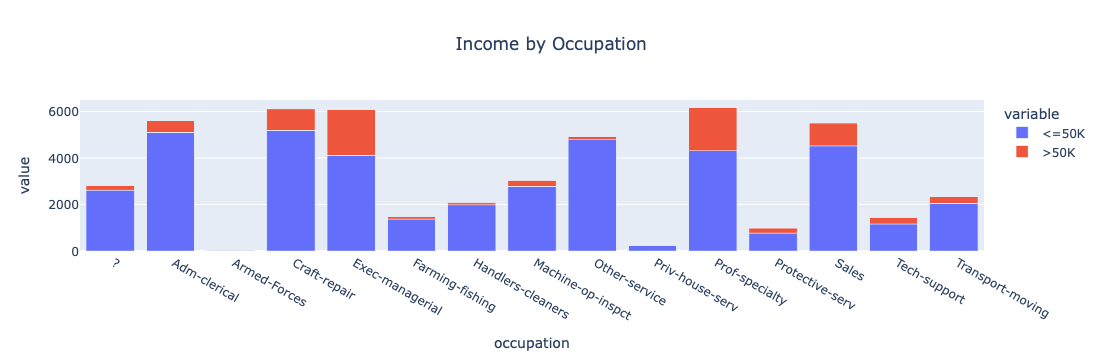

In [359]:
all_income_graph = all_income.reset_index()
inc_bar = px.bar(all_income_graph, x = 'occupation', y = ['<=50K', '>50K'], title = 'Income by Occupation')
inc_bar.update_layout(title_x = 0.5)

Some of these occupations have too low sample sizes to be properly segmented (only 15 total armed forces workers, for example). Of occupations with a sample size >1000, however, I will try to model two highest earning occupations ("Exec-managerial" and "Pro-speciality") as well as the lowest ("Other-service) using the best model so far (random forest). 

Before doing anything else, I will double check that each of these occupations are sufficiently represented in both the training and testing data:

In [133]:
len(train[train['occupation'] == ' Exec-managerial'])

3992

In [134]:
len(test[test['occupation'] == ' Exec-managerial'])

1992

In [136]:
len(train[train['occupation'] == ' Prof-specialty'])

4038

In [360]:
len(test[test['occupation'] == ' Prof-specialty'])

1970

In [362]:
len(train[train['occupation'] == ' Other-service'])

3212

In [364]:
len(test[test['occupation'] == ' Other-service'])

1596

### Exec

In [150]:
train_exec = train[train['occupation'] == ' Exec-managerial']
test_exec = test[test['occupation'] == ' Exec-managerial']
train_exec_x = train_exec[['age', 'workclass_private', 'fnlwgt', 'education-num', 'married', 'white', 'black', 'male', 'capital', 'hours-per-week', 'US']]
test_exec_x = test_exec[['age', 'workclass_private', 'fnlwgt', 'education-num', 'married', 'white', 'black', 'male', 'capital', 'hours-per-week', 'US']]
train_exec_y = train_exec['class>50K']
test_exec_y = test_exec['class>50K']

In [164]:
rfm_exec = RandomForestClassifier(random_state=0)
rfm_exec.fit(train_exec_x, train_exec_y)

RandomForestClassifier(random_state=0)

In [165]:
y_pred_rf_exec = rfm_exec.predict(test_exec_x)
len(y_pred_rf_exec)

1992

In [166]:
metrics.confusion_matrix(test_exec_y, y_pred_rf_exec)

array([[832, 230],
       [230, 700]])

In [167]:
rf_auroc_exec = metrics.roc_auc_score(test_exec_y, y_pred_rf_exec)
rf_auroc_exec

0.7680578336674564

In [373]:
# Model Accuracy
rf_acc_exec = sum(test_exec_y == y_pred_rf_exec) / len(test_exec_y)
rf_acc_exec

0.7690763052208835

About 32% of executives made at least $50K a year; thus, the baseline model accuracy we're striving for is around 68% (a model predicting all executives make less than 50K would be correct 68% of the time). This model is making the correct prediction around 77% of the time, which is a significant but not massive upgrade from our baseline. This is reflected in a mediocre AUROC also around 77%

### Prof

In [151]:
train_prof = train[train['occupation'] == ' Prof-specialty']
test_prof = test[test['occupation'] == ' Prof-specialty']
train_prof_x = train_prof[['age', 'workclass_private', 'fnlwgt', 'education-num', 'married', 'white', 'black', 'male', 'capital', 'hours-per-week', 'US']]
test_prof_x = test_prof[['age', 'workclass_private', 'fnlwgt', 'education-num', 'married', 'white', 'black', 'male', 'capital', 'hours-per-week', 'US']]
train_prof_y = train_prof['class>50K']
test_prof_y = test_prof['class>50K']

In [169]:
rfm_prof = RandomForestClassifier(random_state=0)
rfm_prof.fit(train_prof_x, train_prof_y)

RandomForestClassifier(random_state=0)

In [170]:
y_pred_rf_prof = rfm_prof.predict(test_prof_x)
len(y_pred_rf_prof)

1970

In [171]:
metrics.confusion_matrix(test_prof_y, y_pred_rf_prof)

array([[861, 216],
       [227, 666]])

In [172]:
rf_auroc_prof = metrics.roc_auc_score(test_prof_y, y_pred_rf_prof)
rf_auroc_prof

0.7726217844142151

In [173]:
# Model Accuracy
rf_acc_prof = sum(test_prof_y == y_pred_rf_prof) / len(test_prof_y)
rf_acc_prof

0.7751269035532995

This model is performing almost exactly the same as the one above. 78% accuracy (compared to about a 70% baseline) and an AUROC of about 77%.

### Other Service

In [365]:
train_other = train[train['occupation'] == ' Other-service']
test_other = test[test['occupation'] == ' Other-service']
train_other_x = train_other[['age', 'workclass_private', 'fnlwgt', 'education-num', 'married', 'white', 'black', 'male', 'capital', 'hours-per-week', 'US']]
test_other_x = test_other[['age', 'workclass_private', 'fnlwgt', 'education-num', 'married', 'white', 'black', 'male', 'capital', 'hours-per-week', 'US']]
train_other_y = train_other['class>50K']
test_other_y = test_other['class>50K']

In [367]:
rfm_other = RandomForestClassifier(random_state=0)
rfm_other.fit(train_other_x, train_other_y)

RandomForestClassifier(random_state=0)

In [369]:
y_pred_rf_other = rfm_other.predict(test_other_x)
len(y_pred_rf_other)

1596

In [370]:
metrics.confusion_matrix(test_other_y, y_pred_rf_other)

array([[1530,    2],
       [  49,   15]])

In [371]:
rf_auroc_other = metrics.roc_auc_score(test_other_y, y_pred_rf_other)
rf_auroc_other

0.6165347584856398

In [372]:
# Model Accuracy
rf_acc_other = sum(test_other_y == y_pred_rf_other) / len(test_other_y)
rf_acc_other

0.9680451127819549

I also modeled the least likely profession to earn over 50K (Other-service, with only about 2% of workers earning that much). This is a perfect example of how a seemingly accurate model can actually be junk. The model I built here is 97% accurate, which seems fantastic on the surface, but a low AUROC score of under 62% hints at an issue within the model. This issue is of course the same one I've been talking about over and over again: the baseline accuracy of the most simple possible model. 98% of "other service" employees make less than 50K a year, so if I simply guessed that every single one of these employees made under 50K, I'd be correct 98% of the time. On the other hand, this model is correct only 97% of the time. Thus, while the model appears amazingly accurate upon first glance, this is only because the underlying data is incredibly predictable and therefore this model is actually junk.